# Stock Price Volatility Model
## Table of Content
* [1. Loading the Data ](#loading-data)
* [2. Visualize the closing price history](#visualize)
* [3. Scaling Data](#scaling)
* [4. Create the training dataset](#train)
* [5. Build the LSTM model](#build)
* [6. Create the testing dataset](#datatest)
* [7. Plot the data](#plotpredict)

### 1. Loading the Data <a class='anchor' id='loading-data'></a>

In [1]:
# import the data
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense ,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
msn_df=pd.read_csv('./data/MSN.csv')

In [3]:
msn_df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


### 2. Visualize the closing price history <a class='anchor' id='visualize'></a>

In [4]:
msn_df['Date/Time']=pd.to_datetime(msn_df['Date/Time'])
msn_df.sort_values('Date/Time', inplace=True)

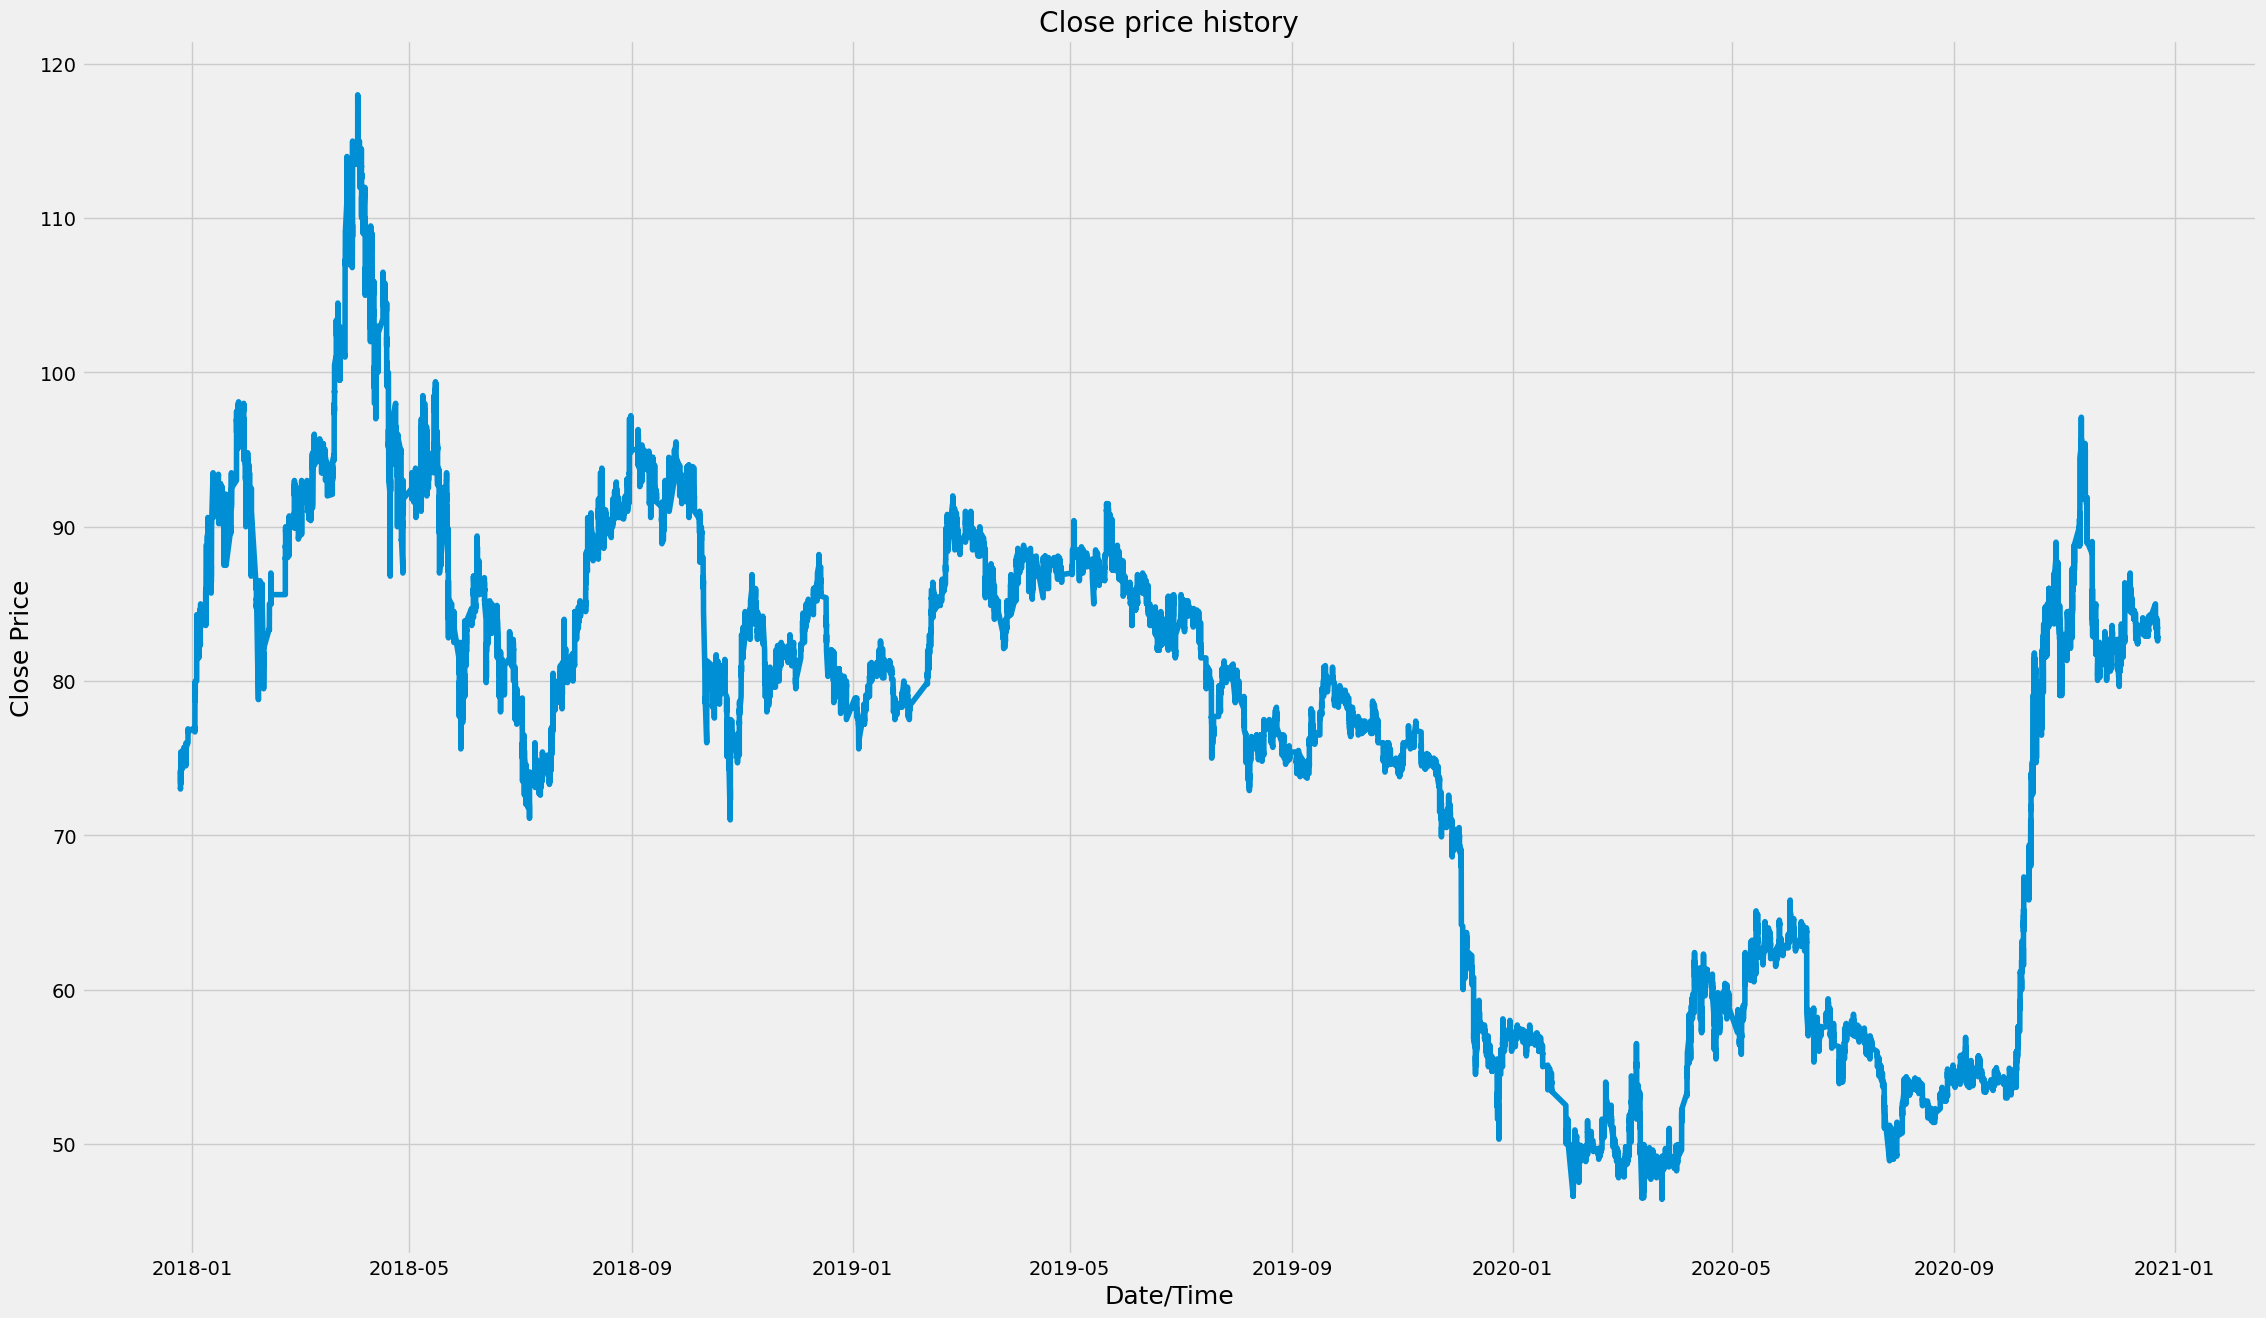

In [5]:
plt.figure(figsize=(25,15))
plt.title("Close price history")
plt.plot(msn_df['Date/Time'],msn_df['Close'])
plt.xlabel('Date/Time',fontsize=18)
plt.ylabel('Close Price',fontsize=18);
plt.show();

### 3. Scaling Data <a class='' id='scaling'></a>

In [6]:
data=msn_df.filter(['Close'])

In [7]:
dataset=data.values

In [8]:
training_data_len=math.ceil(len(dataset)*.8)

In [9]:
training_data_len

108284

In [11]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [12]:
scaled_data.shape

(135354, 1)

### 4. Create the training dataset <a class='' id='train'></a>

In [13]:
# create the scaled training dataset
train_data=scaled_data[0 : training_data_len,:]

In [14]:
x_train=[] #training features
y_train=[] #target 
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=61:
        print(x_train)
        print(y_train)
        print()

[array([0.37290503, 0.37150838, 0.37849162, 0.37290503, 0.37150838,
       0.37290503, 0.37290503, 0.37569832, 0.37849162, 0.37569832,
       0.37290503, 0.37290503, 0.37290503, 0.37569832, 0.37569832,
       0.37569832, 0.37430168, 0.37569832, 0.37569832, 0.37430168,
       0.37290503, 0.37430168, 0.37290503, 0.37150838, 0.37150838,
       0.37150838, 0.37150838, 0.37290503, 0.37150838, 0.37150838,
       0.37290503, 0.37290503, 0.37290503, 0.37430168, 0.37569832,
       0.37569832, 0.37849162, 0.38268156, 0.38268156, 0.38547486,
       0.38547486, 0.38547486, 0.38547486, 0.38826816, 0.38547486,
       0.38547486, 0.38547486, 0.38547486, 0.38547486, 0.38826816,
       0.38687151, 0.38687151, 0.38687151, 0.38687151, 0.38547486,
       0.38407821, 0.38407821, 0.38268156, 0.38128492, 0.38128492])]
[0.3840782122905029]

[array([0.37290503, 0.37150838, 0.37849162, 0.37290503, 0.37150838,
       0.37290503, 0.37290503, 0.37569832, 0.37849162, 0.37569832,
       0.37290503, 0.37290503, 0.372

In [15]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [16]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(108224, 60, 1)

### 5. Build the LSTM model <a class='' id='build'></a>

In [17]:
model=Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\ngoqu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
model.fit(x_train,y_train,batch_size=32,epochs=1)

3382/3382 ━━━━━━━━━━━━━━━━━━━━ 206s 60ms/step - loss: 0.0020


### 6. Create the testing dataset<a class='' id='datatest'></a>

In [21]:
#create the testing dataset
#create a new array containing scale values from index 77865 to 97406
test_data=scaled_data[training_data_len - 60: , :]
#create the dataset x_test,y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [22]:
#convert the data to numpy array
x_test=np.array(x_test)

In [23]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(27070, 60, 1)

In [24]:
#get the model predicted the values
predictions=model.predict(x_test)

846/846 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step


In [25]:
predictions=scaler.inverse_transform(predictions)

In [26]:
predictions

array([[58.314007],
       [58.304634],
       [58.29462 ],
       ...,
       [83.20698 ],
       [83.21448 ],
       [83.22126 ]], dtype=float32)

In [27]:
#get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.3041685649926786

### 7.Plot the data<a class='' id='plotpredict'></a>

In [28]:
msn_df = msn_df.set_index('Date/Time')

C:\Users\ngoqu\AppData\Local\Temp\ipykernel_7708\3540206025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


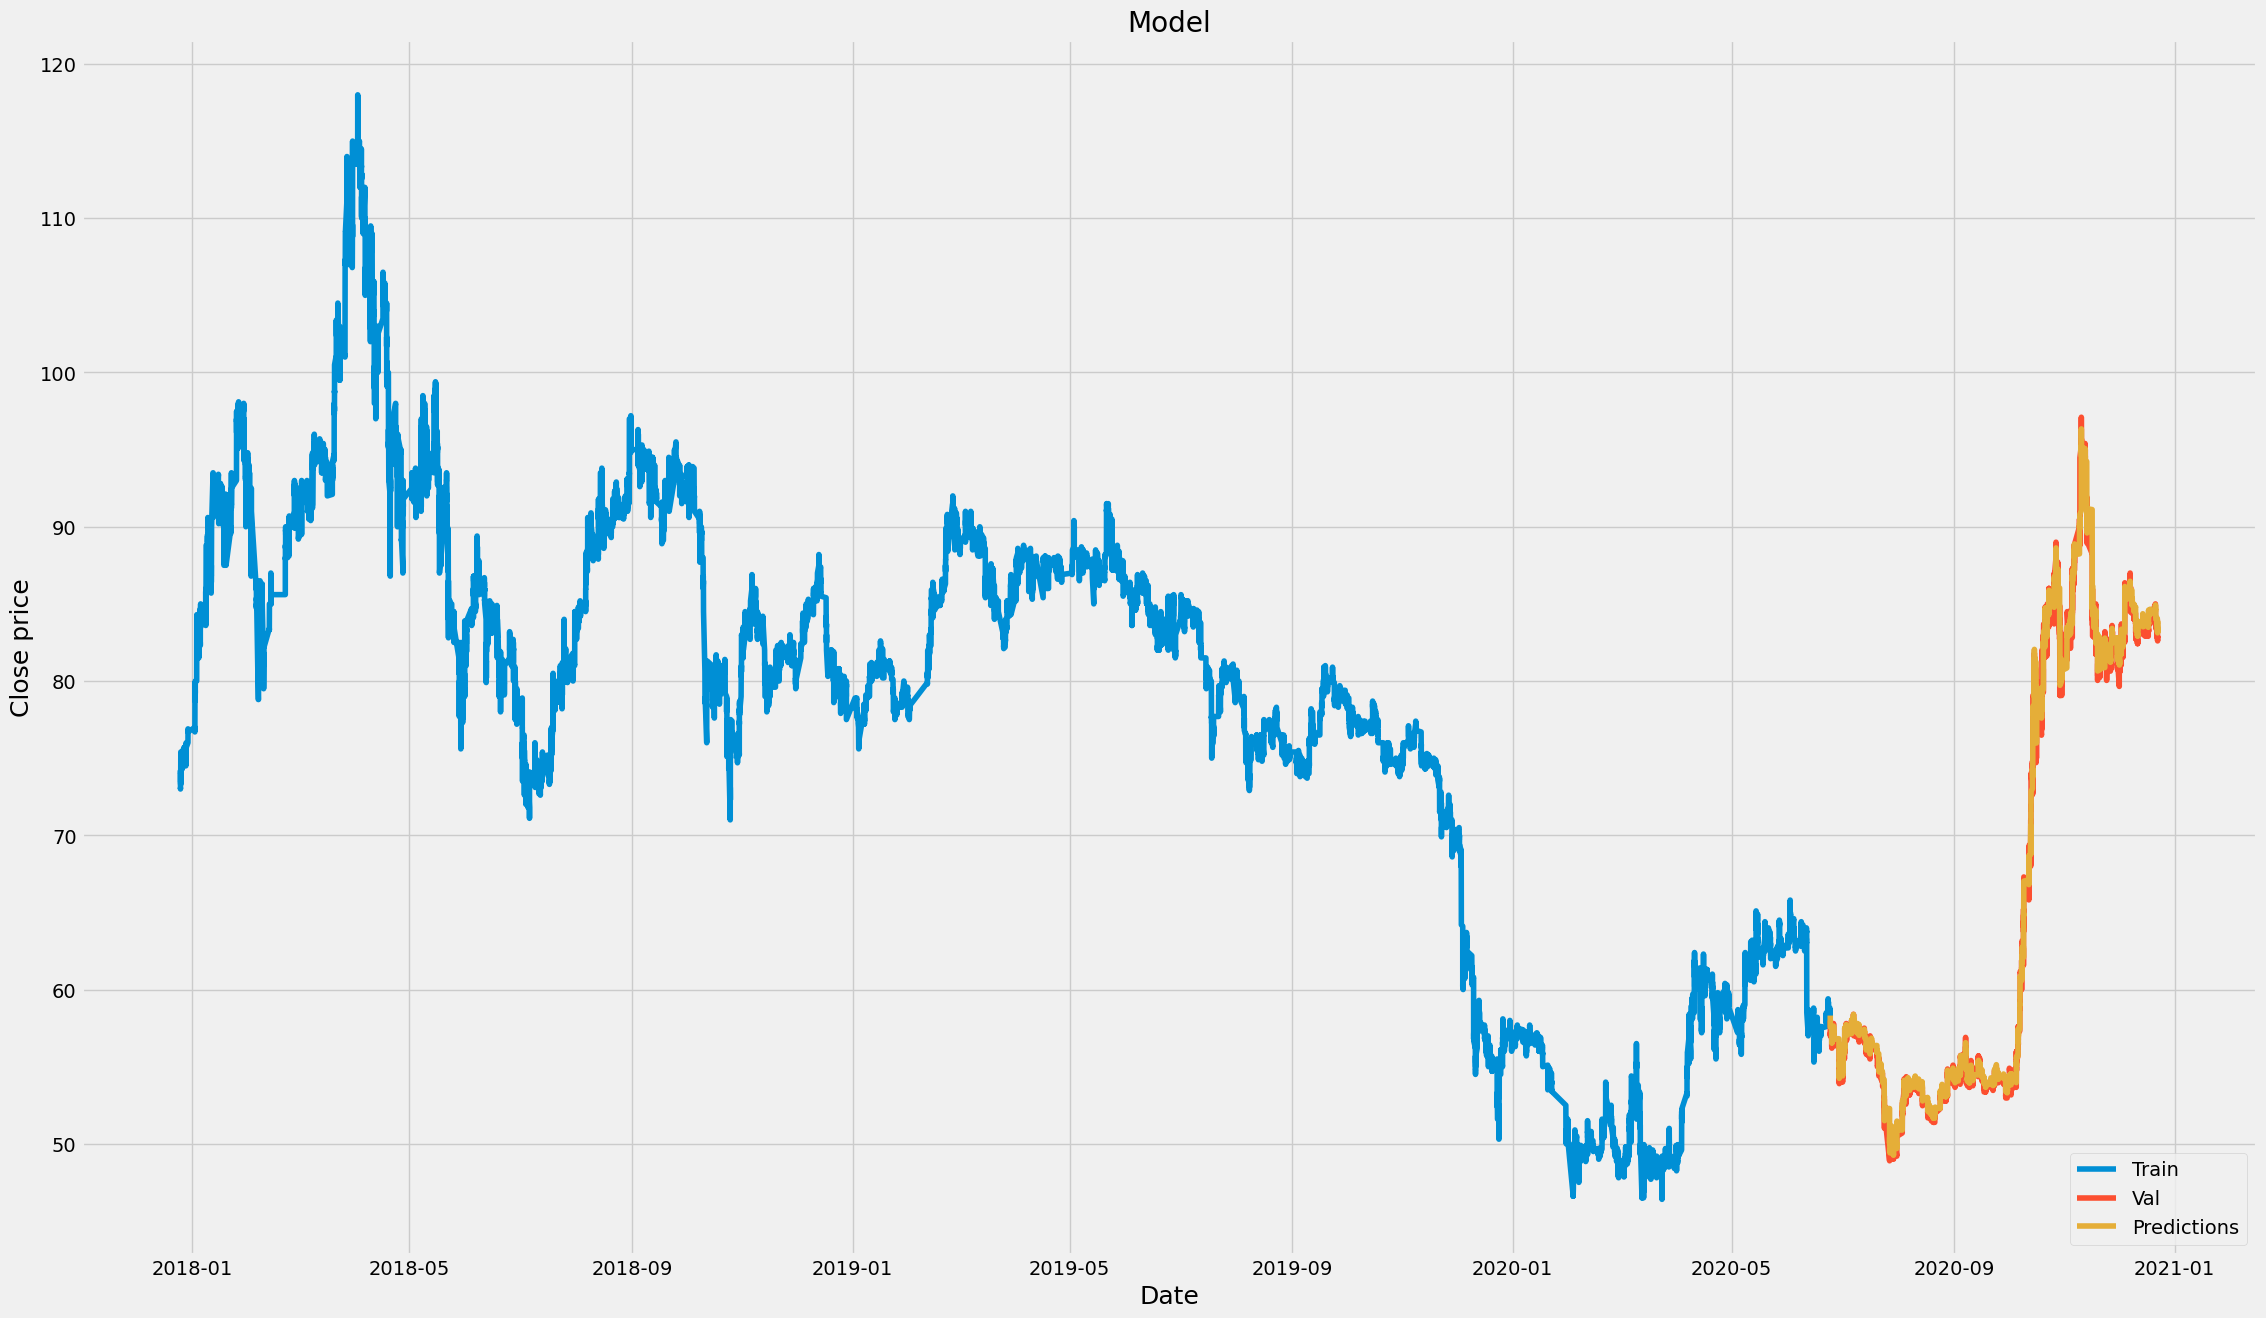

In [29]:
#plot the data
train=msn_df[:training_data_len]
valid=msn_df[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(25,15))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions'
                   ]])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show();

In [56]:
#show the valid and predicted prices
a=valid.filter(['Close','Predictions'])

In [57]:
a

,Close,Predictions
Date/Time,,
2020-06-24 13:50:00,58.0,58.136562
2020-06-24 13:52:00,58.0,58.125340
2020-06-24 13:53:00,57.9,58.113728
2020-06-24 13:54:00,57.9,58.096302
2020-06-24 13:55:00,58.0,58.076389
...,...,...
2020-12-22 14:23:00,82.8,82.851715
2020-12-22 14:24:00,82.8,82.861610
2020-12-22 14:25:00,82.8,82.870949
